✅ Đã tải dữ liệu thành công!
Kích thước bộ dữ liệu: (303, 14) (303 dòng là chuẩn)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\thanh\AppData\Local\Temp\ipykernel_11004\1996800334.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


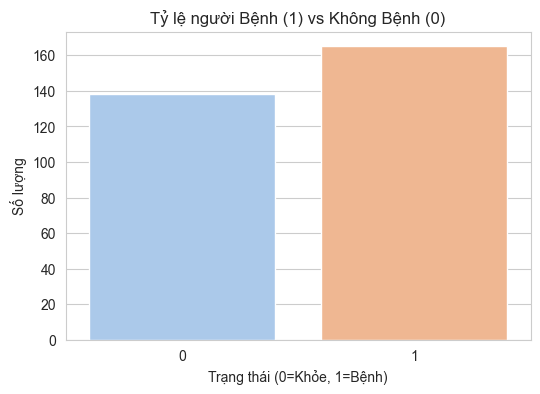

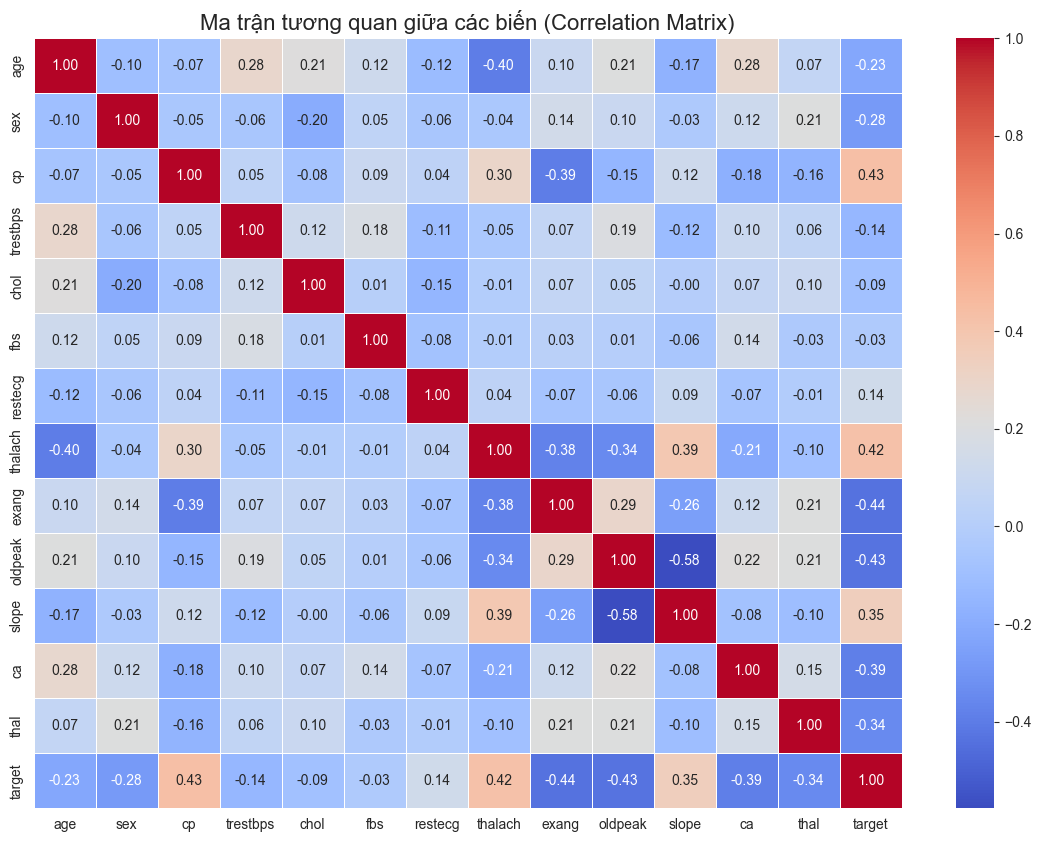

👉 NHẬN XÉT: Các biến có màu đỏ đậm hoặc xanh đậm ở dòng 'target' là những yếu tố quan trọng.

Kích thước dữ liệu sau khi mã hóa: (303, 19)


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,False,False,True,True,False,False,False,False
1,37,1,130,250,0,1,187,0,3.5,0,1,False,True,False,False,True,False,False,False
2,41,0,130,204,0,0,172,0,1.4,0,1,True,False,False,False,True,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,1,True,False,False,False,True,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,1,False,False,False,False,True,False,False,True


Số lượng mẫu huấn luyện: 242
Số lượng mẫu kiểm tra: 61

✅ Đã huấn luyện xong mô hình Random Forest!
🎯 ĐỘ CHÍNH XÁC (ACCURACY): 86.89%
------------------------------

Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



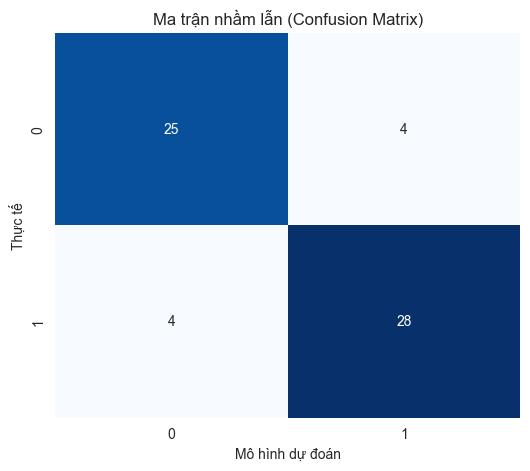

👉 GIẢI THÍCH: Đường chéo chính (màu đậm) là số lần mô hình đoán ĐÚNG.


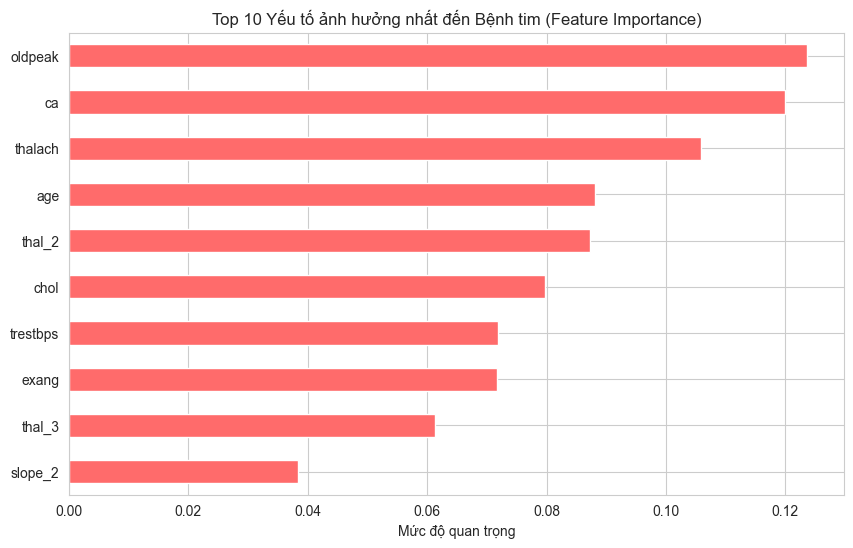

👉 GIẢI THÍCH VỚI THẦY: Mô hình AI dựa chủ yếu vào các yếu tố trên cùng (như Đau ngực, Nhịp tim, Thalassemia...) để đưa ra quyết định.

💾 Đã lưu mô hình thành công tại: models/heart_disease_model.pkl
Bây giờ bạn có thể tích hợp file này vào app.py!


In [9]:
# ==========================================
# FILE: model_training.ipynb
# MÔ TẢ: Huấn luyện mô hình AI dự đoán bệnh tim
# DỮ LIỆU: UCI Heart Disease Dataset (Standard)
# ==========================================

# --- 1. IMPORT THƯ VIỆN ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle # Thư viện để lưu model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cấu hình hiển thị biểu đồ
%matplotlib inline
sns.set_style("whitegrid")

# --- 2. TẢI DỮ LIỆU ---
# Lưu ý: Đổi tên file csv của bạn thành 'heart.csv' và để trong thư mục 'data'
# Hoặc sửa đường dẫn bên dưới cho đúng với file của bạn
try:
    df = pd.read_csv('../data/heart.csv')
    print("✅ Đã tải dữ liệu thành công!")
    print(f"Kích thước bộ dữ liệu: {df.shape} (303 dòng là chuẩn)")
except FileNotFoundError:
    print("❌ Lỗi: Không tìm thấy file dữ liệu. Hãy kiểm tra lại đường dẫn.")

# Xem 5 dòng đầu
display(df.head())

# --- 3. PHÂN TÍCH KHÁM PHÁ (EDA) - TRẢ LỜI CÂU HỎI CỦA THẦY ---

# 3.1. Kiểm tra sự cân bằng của dữ liệu (Target)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Tỷ lệ người Bệnh (1) vs Không Bệnh (0)')
plt.xlabel('Trạng thái (0=Khỏe, 1=Bệnh)')
plt.ylabel('Số lượng')
plt.show()

# 3.2. Vẽ Ma trận tương quan (Correlation Matrix)
# Biểu đồ này giúp trả lời câu hỏi: "Yếu tố nào liên quan mật thiết nhất đến bệnh tim?"
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Ma trận tương quan giữa các biến (Correlation Matrix)", fontsize=16)
plt.show()
print("👉 NHẬN XÉT: Các biến có màu đỏ đậm hoặc xanh đậm ở dòng 'target' là những yếu tố quan trọng.")

# --- 4. TIỀN XỬ LÝ DỮ LIỆU ---

# One-hot encoding cho các biến phân loại (Categorical)
# Giúp mô hình hiểu rằng 'loại đau ngực 1' khác 'loại đau ngực 2' chứ không phải lớn/nhỏ hơn.
categorical_cols = ['cp', 'thal', 'slope'] 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nKích thước dữ liệu sau khi mã hóa:", df_encoded.shape)
display(df_encoded.head())

# Tách biến đầu vào (Features - X) và biến mục tiêu (Target - y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Chia tập dữ liệu: 80% để Huấn luyện (Train), 20% để Kiểm tra (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Số lượng mẫu huấn luyện: {X_train.shape[0]}")
print(f"Số lượng mẫu kiểm tra: {X_test.shape[0]}")

# --- 5. HUẤN LUYỆN MÔ HÌNH (RANDOM FOREST) ---

# Khởi tạo mô hình Random Forest
# n_estimators=100: Dùng 100 cây quyết định
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Bắt đầu học từ dữ liệu Train
model.fit(X_train, y_train)
print("\n✅ Đã huấn luyện xong mô hình Random Forest!")

# --- 6. ĐÁNH GIÁ MÔ HÌNH ---

# Dự đoán thử trên tập Test
y_pred = model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 ĐỘ CHÍNH XÁC (ACCURACY): {accuracy * 100:.2f}%")
print("-" * 30)

# Báo cáo chi tiết
print("\nBáo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred))

# Vẽ Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ma trận nhầm lẫn (Confusion Matrix)')
plt.xlabel('Mô hình dự đoán')
plt.ylabel('Thực tế')
plt.show()
print("👉 GIẢI THÍCH: Đường chéo chính (màu đậm) là số lần mô hình đoán ĐÚNG.")

# --- 7. GIẢI THÍCH MÔ HÌNH (FEATURE IMPORTANCE) ---
# Phần này cực quan trọng để báo cáo với Thầy về "Trọng số"

# Lấy giá trị quan trọng từ mô hình
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Vẽ biểu đồ Top 10 yếu tố quan trọng nhất
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='#ff6b6b')
plt.title('Top 10 Yếu tố ảnh hưởng nhất đến Bệnh tim (Feature Importance)')
plt.xlabel('Mức độ quan trọng')
plt.gca().invert_yaxis() # Đảo ngược để cái quan trọng nhất lên đầu
plt.show()

print("👉 GIẢI THÍCH VỚI THẦY: Mô hình AI dựa chủ yếu vào các yếu tố trên cùng (như Đau ngực, Nhịp tim, Thalassemia...) để đưa ra quyết định.")

# --- 8. LƯU MÔ HÌNH ---
# Lưu thành file .pkl để dùng cho Web App
import os
if not os.path.exists('models'):
    os.makedirs('models')

filename = 'models/heart_disease_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\n💾 Đã lưu mô hình thành công tại: {filename}")
print("Bây giờ bạn có thể tích hợp file này vào app.py!")

In [10]:
print("Danh sách cột Input chuẩn:")
print(X_train.columns.tolist())

Danh sách cột Input chuẩn:
['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3', 'slope_1', 'slope_2']
